In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Configuration pour que les graphiques soient jolis dans VS Code
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Chemin vers les CSV (relatif à l'emplacement du notebook data/exploration.ipynb)
CSV_DIR = 'csv/'

print("Environnement initialisé.")

Environnement initialisé.


In [ ]:
# Cellule 2 : Chargement des données avec nettoyage des en-têtes

schemas = {
    'movies.csv': ['mid', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes'],
    'persons.csv': ['pid', 'primaryName', 'birthYear', 'deathYear'],
    'ratings.csv': ['mid', 'averageRating', 'numVotes'],
    'genres.csv': ['mid', 'genre'],
    'principals.csv': ['mid', 'ordering', 'pid', 'category', 'job']
    }

dfs = {}

print("Chargement des fichiers CSV avec correction des en-têtes...")

for filename, cols in schemas.items():
    path = os.path.join(CSV_DIR, filename)
    key = filename.replace('.csv', '') # ex: 'movies'
    
    if os.path.exists(path):
        try:
            dfs[key] = pd.read_csv(
                path, 
                header=0, 
                names=cols, 
                sep=',', 
                na_values=['\\N', 'NaN', ''], 
                low_memory=False,
                on_bad_lines='skip' # Sécurité si une ligne est mal formée
            )
            
            
            if 'startYear' in dfs[key].columns:
                
                dfs[key]['startYear'] = pd.to_numeric(dfs[key]['startYear'], errors='coerce')

            print(f" {filename} chargé proprement ({len(dfs[key])} lignes).")

        except Exception as e:
            print(f" Erreur sur {filename}: {e}")
    else:
        print(f"⚠️ Fichier introuvable : {filename}")

# Raccourcis pour la suite du notebook
df_movies = dfs.get('movies')
df_ratings = dfs.get('ratings')
df_genres = dfs.get('genres')
df_principals = dfs.get('principals')
df_persons = dfs.get('persons')

print("\nVérification des colonnes de Movies :", df_movies.columns.tolist())

Chargement des fichiers CSV avec correction des en-têtes...
✅ movies.csv chargé proprement (36859 lignes).
✅ persons.csv chargé proprement (145847 lignes).
✅ ratings.csv chargé proprement (36859 lignes).
✅ genres.csv chargé proprement (85426 lignes).
✅ principals.csv chargé proprement (361863 lignes).

Vérification des colonnes de Movies : ['mid', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes']


In [3]:
def analyze_dataframe(df, name):
    print(f"--- ANALYSE : {name} ---")
    
    # 1. Nombre de lignes et colonnes [cite: 136]
    rows, cols = df.shape
    print(f"Dimensions : {rows} lignes, {cols} colonnes")
    
    # 2. Types de données [cite: 137]
    print("\nTypes de données :")
    print(df.dtypes)
    
    # 3. Valeurs manquantes [cite: 138]
    print("\nValeurs manquantes (NaN) :")
    missing = df.isnull().sum()
    print(missing[missing > 0])
    
    # 4. Valeurs uniques [cite: 139]
    print("\nValeurs uniques par colonne (Top 5) :")
    for col in df.columns:
        print(f"  - {col}: {df[col].nunique()} uniques")
    print("\n" + "="*30 + "\n")

# Exécution de l'analyse sur tous les dataframes chargés
for name, df in dfs.items():
    analyze_dataframe(df, name)

--- ANALYSE : movies ---
Dimensions : 36859 lignes, 8 colonnes

Types de données :
mid                object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear           int64
endYear           float64
runtimeMinutes    float64
dtype: object

Valeurs manquantes (NaN) :
endYear           36859
runtimeMinutes       40
dtype: int64

Valeurs uniques par colonne (Top 5) :
  - mid: 36859 uniques
  - titleType: 1 uniques
  - primaryTitle: 34406 uniques
  - originalTitle: 35206 uniques
  - isAdult: 1 uniques
  - startYear: 111 uniques
  - endYear: 0 uniques
  - runtimeMinutes: 223 uniques


--- ANALYSE : persons ---
Dimensions : 145847 lignes, 4 colonnes

Types de données :
pid             object
primaryName     object
birthYear      float64
deathYear      float64
dtype: object

Valeurs manquantes (NaN) :
birthYear     80311
deathYear    123826
dtype: int64

Valeurs uniques par colonne (Top 5) :
  - pid: 145847 uniques
  - primaryN

In [4]:
print("Colonnes détectées :", df_movies.columns.tolist())
display(df_movies.head(2))

Colonnes détectées : ['mid', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes']


,mid,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes
0,tt0002130,movie,Dante's Inferno,L'Inferno,0,1911,NaN,71.0
1,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0,1913,NaN,54.0


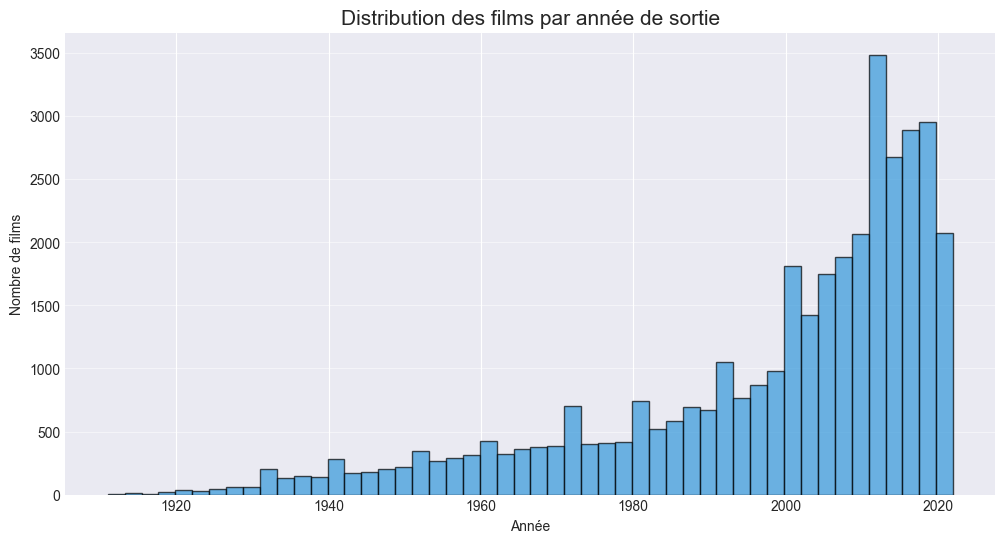

In [ ]:
years = pd.to_numeric(df_movies['startYear'], errors='coerce').dropna()

plt.figure(figsize=(12, 6))
plt.hist(years, bins=50, color='#3498db', edgecolor='black', alpha=0.7)
plt.title('Distribution des films par année de sortie', fontsize=15)
plt.xlabel('Année')
plt.ylabel('Nombre de films')
plt.grid(axis='y', alpha=0.5)
plt.show()

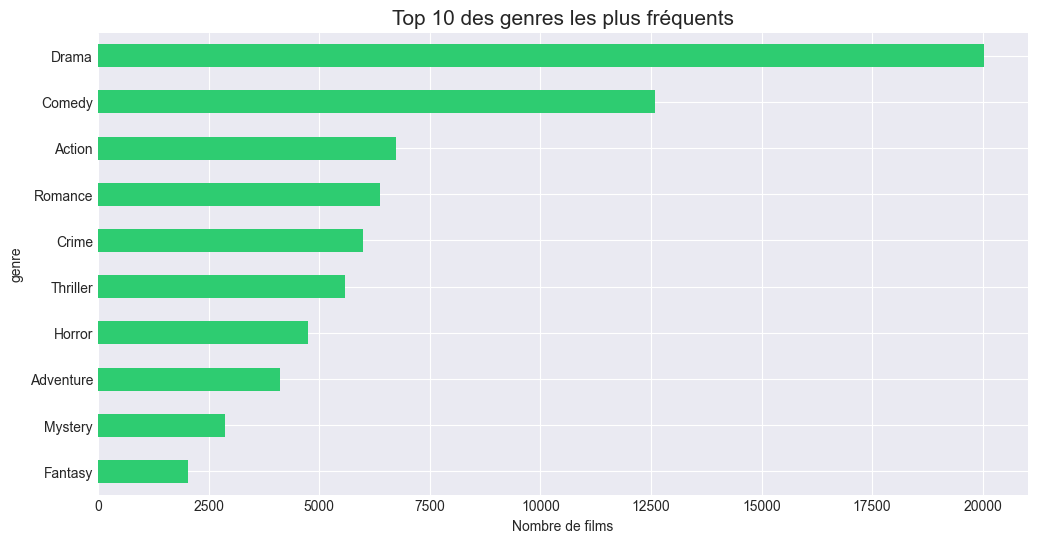

Détail du Top 10 :
genre
Drama        20019
Comedy       12596
Action        6730
Romance       6378
Crime         5986
Thriller      5595
Horror        4752
Adventure     4114
Mystery       2875
Fantasy       2040
Name: count, dtype: int64


In [6]:
# Comptage des genres
top_genres = df_genres['genre'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_genres.sort_values().plot(kind='barh', color='#2ecc71')
plt.title('Top 10 des genres les plus fréquents', fontsize=15)
plt.xlabel('Nombre de films')
plt.show()

print("Détail du Top 10 :")
print(top_genres)

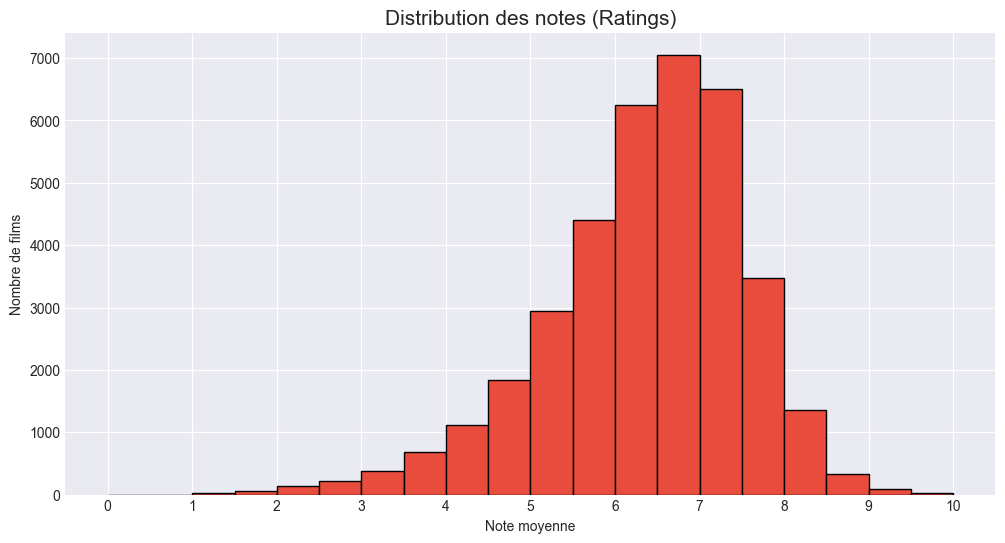

Note moyenne globale : 6.32
Note médiane : 6.5


In [7]:
plt.figure(figsize=(12, 6))
plt.hist(df_ratings['averageRating'].dropna(), bins=20, range=(0,10), color='#e74c3c', edgecolor='black')
plt.title('Distribution des notes (Ratings)', fontsize=15)
plt.xlabel('Note moyenne')
plt.ylabel('Nombre de films')
plt.xticks(range(11))
plt.show()

print(f"Note moyenne globale : {df_ratings['averageRating'].mean():.2f}")
print(f"Note médiane : {df_ratings['averageRating'].median()}")

Nombre moyen d'acteurs par film : 4.04


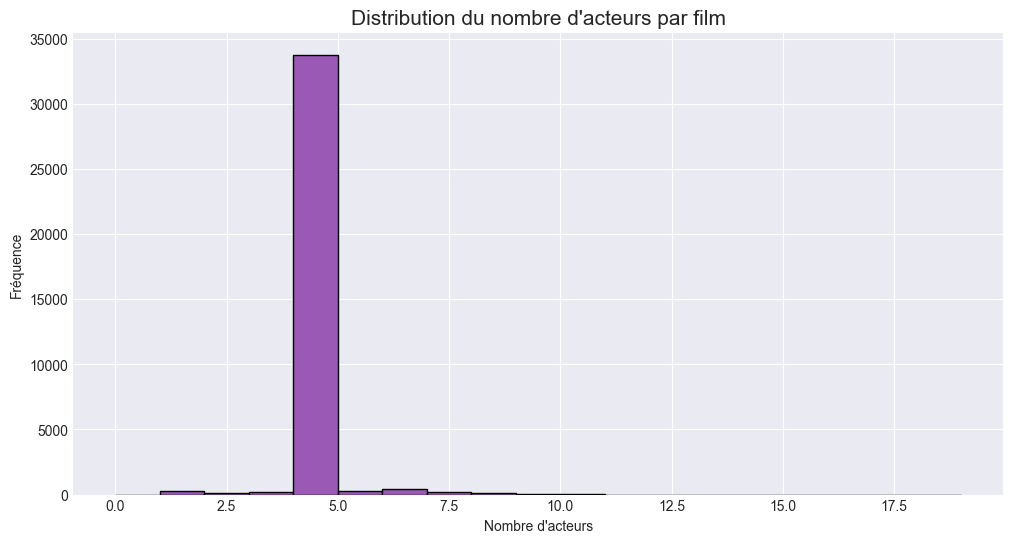

In [8]:
# Filtrer pour ne garder que les catégories 'actor' et 'actress'
actors_only = df_principals[df_principals['category'].isin(['actor', 'actress'])]

# Compter le nombre d'acteurs par 'mid' (movie_id)
actors_per_movie = actors_only.groupby('mid').size()

# Calculer la moyenne
avg_actors = actors_per_movie.mean()

print(f"Nombre moyen d'acteurs par film : {avg_actors:.2f}")

# Visualisation optionnelle (Distribution)
plt.figure(figsize=(12, 6))
plt.hist(actors_per_movie, bins=range(0, 20), color='#9b59b6', edgecolor='black')
plt.title("Distribution du nombre d'acteurs par film", fontsize=15)
plt.xlabel("Nombre d'acteurs")
plt.ylabel("Fréquence")
plt.show()

In [9]:
print("--- Vérification de l'intégrité référentielle ---")

# Ensemble des IDs de films valides
valid_movie_ids = set(df_movies['mid'].unique())

# Vérification pour Ratings
ratings_movie_ids = set(df_ratings['mid'].unique())
orphans_ratings = ratings_movie_ids - valid_movie_ids
integrity_ratings = len(orphans_ratings) == 0

print(f"Table Ratings :")
print(f" - Tous les movie_id existent dans Movies ? {'✅ OUI' if integrity_ratings else '❌ NON'}")
if not integrity_ratings:
    print(f" - Nombre de notes orphelines : {len(orphans_ratings)}")

# Vérification pour Principals
principals_movie_ids = set(df_principals['mid'].unique())
orphans_principals = principals_movie_ids - valid_movie_ids
integrity_principals = len(orphans_principals) == 0

print(f"\nTable Principals :")
print(f" - Tous les movie_id existent dans Movies ? {'✅ OUI' if integrity_principals else '❌ NON'}")
if not integrity_principals:
    print(f" - Nombre de lignes orphelines : {len(orphans_principals)}")

# Vérification Clés étrangères Persons (pid)
valid_person_ids = set(df_persons['pid'].unique())
principals_person_ids = set(df_principals['pid'].unique())
orphans_persons = principals_person_ids - valid_person_ids

print(f"\nTable Persons (via Principals) :")
print(f" - Tous les person_id existent dans Persons ? {'✅ OUI' if len(orphans_persons) == 0 else '❌ NON'}")
if len(orphans_persons) > 0:
    print(f" - Nombre de personnes inconnues dans le casting : {len(orphans_persons)}")

--- Vérification de l'intégrité référentielle ---
Table Ratings :
 - Tous les movie_id existent dans Movies ? ✅ OUI

Table Principals :
 - Tous les movie_id existent dans Movies ? ✅ OUI

Table Persons (via Principals) :
 - Tous les person_id existent dans Persons ? ❌ NON
 - Nombre de personnes inconnues dans le casting : 5
